In [1]:
pip install pypr


Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Import libraries 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import os
import datetime as dt
# %matplotlib inline



In [2]:
# Load the data.
df = pd.read_table('Data/KO_LEE_READY.txt', sep = " ")
df = df.reset_index()
df = df[['index', 'SYMBOL', 'BID', 'BIDSIZ', 'OFR', 'OFRSIZ', 'PRICE', 'SIZE', 'EX', 'DT']]
names = ['DATE_TIME',  'SYMBOL', 'BID', 'BIDSIZ', 'OFR', 'OFRSIZ', 'PRICE', 'SIZE', 'EX', 'DT']
df.columns = names

df['DATE_TIME'] = df['DATE_TIME'].str.replace('X', '')  # remove the X
df['DATE_TIME'] = df['DATE_TIME'].str[:-3]              # remove nan-seconds to be consistent will all rows.   :(
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format = '%Y.%m.%d.%H.%M.%S.%f') # save it as a date time variable
df.head()

,DATE_TIME,SYMBOL,BID,BIDSIZ,OFR,OFRSIZ,PRICE,SIZE,EX,DT
0,2022-03-01 00:00:00.020,KO,62.25,1,62.30,1,62.24,0,NYS,-1
1,2022-03-01 14:30:01.244,KO,62.07,2,62.27,2,62.14,277740,NYS,-1
2,2022-03-01 14:30:02.000,KO,62.10,3,62.13,1,62.10,566,NYS,-1
3,2022-03-01 14:30:02.032,KO,62.08,1,62.12,1,62.09,200,NYS,-1
4,2022-03-01 14:30:03.256,KO,62.05,1,62.09,4,62.06,100,NYS,-1


In [4]:
EST = []
n_row, n_col = df.shape

cont = 5
#final_time = given_time - pd.DateOffset(hours=n)

for i in range(0, n_row):
    EST.append(df['DATE_TIME'].iloc[i]  - pd.DateOffset(hours=cont))

df.insert(1, 'EST', EST)
df.head()

ValueError: cannot insert EST, already exists

In [5]:
df['BidAskSpread'] = df['BID']- df['OFR']
df.head()

,DATE_TIME,EST,SYMBOL,BID,BIDSIZ,OFR,OFRSIZ,PRICE,SIZE,EX,DT,BidAskSpread
0,2022-03-01 00:00:00.020,2022-02-28 19:00:00.020,KO,62.25,1,62.30,1,62.24,0,NYS,-1,-0.05
1,2022-03-01 14:30:01.244,2022-03-01 09:30:01.244,KO,62.07,2,62.27,2,62.14,277740,NYS,-1,-0.20
2,2022-03-01 14:30:02.000,2022-03-01 09:30:02.000,KO,62.10,3,62.13,1,62.10,566,NYS,-1,-0.03
3,2022-03-01 14:30:02.032,2022-03-01 09:30:02.032,KO,62.08,1,62.12,1,62.09,200,NYS,-1,-0.04
4,2022-03-01 14:30:03.256,2022-03-01 09:30:03.256,KO,62.05,1,62.09,4,62.06,100,NYS,-1,-0.04


In [6]:
df['Return'] = df['PRICE'].pct_change()

In [7]:
df.tail()

,DATE_TIME,EST,SYMBOL,BID,BIDSIZ,OFR,OFRSIZ,PRICE,SIZE,EX,DT,BidAskSpread,Return
63385,2022-03-01 19:19:12.231636,2022-03-01 14:19:12.231636,KO,61.70,23,61.71,4,61.71,100,MID,1,-0.01,0.000000
63386,2022-03-01 19:19:42.536300,2022-03-01 14:19:42.536300,KO,61.70,34,61.71,1,61.71,100,MID,1,-0.01,0.000000
63387,2022-03-01 19:22:03.900500,2022-03-01 14:22:03.900500,KO,61.76,12,61.76,2,61.76,400,MID,1,0.00,0.000810
63388,2022-03-01 20:20:11.168500,2022-03-01 15:20:11.168500,KO,62.01,6,62.02,46,62.01,377,MID,-1,-0.01,0.004048
63389,2022-03-01 20:54:54.721000,2022-03-01 15:54:54.721000,KO,61.95,37,61.96,16,61.96,400,MID,1,-0.01,-0.000806


In [8]:
EX_NAME = 'ADF'  # please subset the data to only one exchange!! 
df1 = df[df['EX'] == EX_NAME].copy()

start_date = pd.to_datetime('2022-03-01 09:30')
end_date = pd.to_datetime('2022-03-01 15:20')
df1.loc[(df1['EST'] > start_date) & (df1['EST'] < end_date)]



,DATE_TIME,EST,SYMBOL,BID,BIDSIZ,OFR,OFRSIZ,PRICE,SIZE,EX,DT,BidAskSpread,Return
10383,2022-03-01 14:30:01.264,2022-03-01 09:30:01.264,KO,62.11,3,62.15,11,62.1100,100,ADF,-1,-0.04,0.002259
10384,2022-03-01 14:30:01.408,2022-03-01 09:30:01.408,KO,62.10,4,62.14,1,62.1400,100,ADF,1,-0.04,0.000483
10385,2022-03-01 14:30:02.268,2022-03-01 09:30:02.268,KO,62.07,1,62.10,1,62.0700,100,ADF,-1,-0.03,-0.001126
10386,2022-03-01 14:30:04.404,2022-03-01 09:30:04.404,KO,62.10,1,62.11,1,62.0900,100,ADF,-1,-0.01,0.000322
10387,2022-03-01 14:30:04.756,2022-03-01 09:30:04.756,KO,62.09,1,62.11,1,62.0900,490,ADF,-1,-0.02,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19803,2022-03-01 20:19:42.512,2022-03-01 15:19:42.512,KO,62.01,51,62.02,3,62.0150,100,ADF,-1,-0.01,-0.000161
19804,2022-03-01 20:19:48.596,2022-03-01 15:19:48.596,KO,62.00,18,62.01,15,62.0078,1000,ADF,1,-0.01,-0.000116
19805,2022-03-01 20:19:49.852,2022-03-01 15:19:49.852,KO,62.00,18,62.01,18,62.0000,168,ADF,-1,-0.01,-0.000126
19806,2022-03-01 20:19:52.440,2022-03-01 15:19:52.440,KO,62.01,11,62.02,27,62.0100,100,ADF,-1,-0.01,0.000161


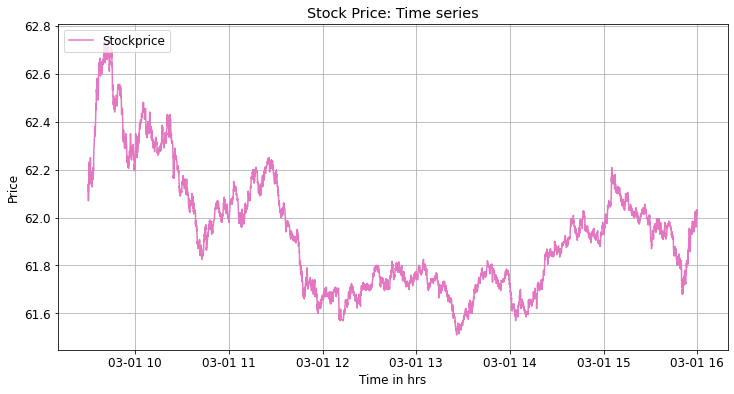

In [9]:
# Specify area
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(12, 6))

# Specify lines 
ax.plot(df1.EST, df1.PRICE, color='tab:pink', label='Stockprice')

# Same as above
ax.set_xlabel('Time in hrs')
ax.set_ylabel('Price')
ax.set_title('Stock Price: Time series')
ax.grid(True)
ax.legend(loc='upper left')

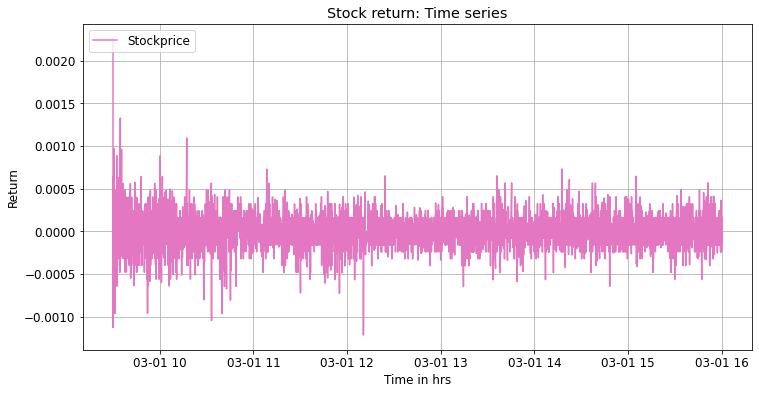

In [10]:
# Specify area
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(12, 6))

# Specify lines 
ax.plot(df1.EST, df1.Return, color='tab:pink', label='Stockprice')

# Same as above
ax.set_xlabel('Time in hrs')
ax.set_ylabel('Return')
ax.set_title('Stock return: Time series')
ax.grid(True)
ax.legend(loc='upper left')

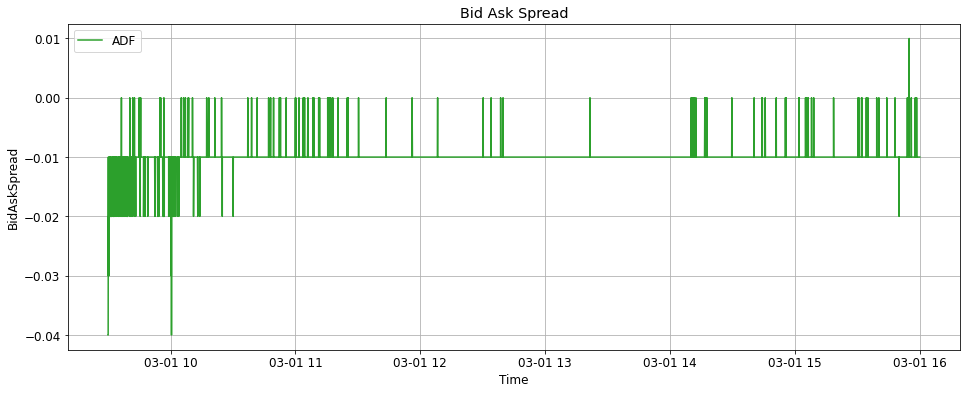

In [11]:
# Specify area
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(16, 6))

# Specify lines 
ax.plot(df1.EST, df1.BidAskSpread, color='tab:green', label='ADF')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('BidAskSpread')
ax.set_title('Bid Ask Spread')
ax.grid(True)
ax.legend(loc='upper left')

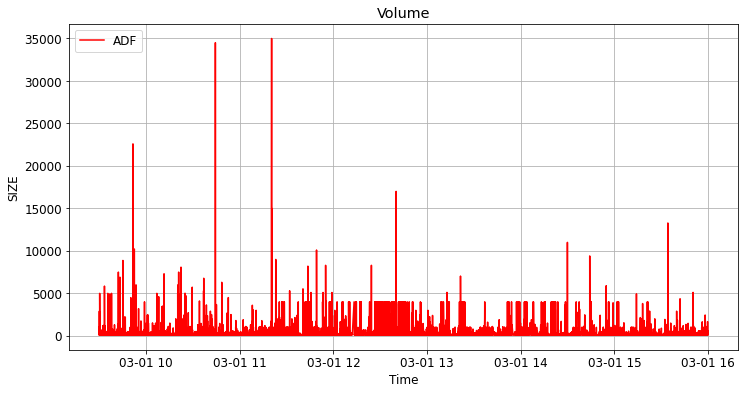

In [12]:
# Specify area
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(12, 6))

# Specify lines 
ax.plot(df1.EST, df1.SIZE, color='red', label='ADF')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('SIZE')
ax.set_title('Volume')
ax.grid(True)
ax.legend(loc='upper left')

In [13]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

C:\Users\sidiy\AppData\Local\Temp/ipykernel_6712/1468696111.py:2: RuntimeWarning: invalid value encountered in log
  gbm = log(cumsum(randn(100000))+1000)


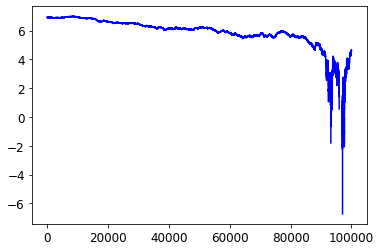

In [14]:
# Create a Gometric Brownian Motion
gbm = log(cumsum(randn(100000))+1000)
plt.plot(gbm, color= 'blue')
plt.show()

In [15]:
#Calculate Hurst Exponent for GBM
print("Hurst(GBM):   %s" % hurst(gbm))

Hurst(GBM):   nan


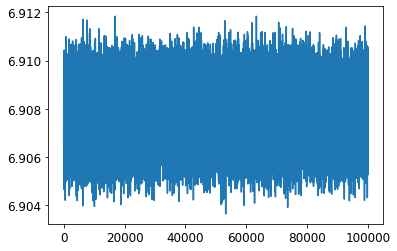

In [16]:
# Create a Mean-Reverting Series
mr = log(randn(100000)+1000)
plt.plot(mr)
plt.show()

In [17]:
#Calculate Hurst Exponent for MR
print("Hurst(MR):    %s" % hurst(mr))

Hurst(MR):    -7.161869827766782e-05


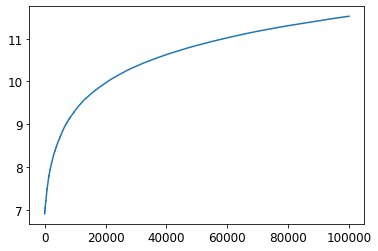

In [18]:
# Create a Trending Series
tr = log(cumsum(randn(100000)+1)+1000)
plt.plot(tr)
plt.show()

In [19]:
print("Hurst(TR):    %s" % hurst(tr))

Hurst(TR):    0.9551987678568136


In [20]:
print("Hurst(ADF):    %s" % hurst(df1[['PRICE']]))

Hurst(ADF):    [0.52607515]


C:\Users\sidiy\AppData\Local\Temp/ipykernel_6712/390008444.py:10: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]


In [27]:
print(pd.__version__)
print(np.__version__)
#1.2.0
#1.19.4

1.3.3
1.21.2


In [28]:
conda uninstall pandas

Solving environment: | 
  - r/linux-64::r-mnormt-1.5_5-r36ha65eedd_0, r/linux-64::r-rjava-0.9_11-r36h96ca727_0, r/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4
  - defaults/linux-64::r-mnormt-1.5_5-r36ha65eedd_0, r/linux-64::r-rjava-0.9_11-r36h96ca727_0, r/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4
  - defaults/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4, r/linux-64::r-mnormt-1.5_5-r36ha65eedd_0, r/linux-64::r-rjava-0.9_11-r36h96ca727_0
  - defaults/linux-64::r-mnormt-1.5_5-r36ha65eedd_0, defaults/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4, r/linux-64::r-rjava-0.9_11-r36h96ca727_0
  - defaults/linux-64::r-rjava-0.9_11-r36h96ca727_0, defaults/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4, r/linux-64::r-mnormt-1.5_5-r36ha65eedd_0
  - defaults/linux-64::r-mnormt-1.5_5-r36ha65eedd_0, defaults/linux-64::r-rjava-0.9_11-r36h96ca727_0, defaults/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4
  - defaults/linux-64::r-rjava-0.9_11-r36h96ca727_0, r/linux-64::r-mnormt-1.5_5-r36ha65eedd_0, r/noarch::r-xlsxjars-0.6.1-r36h6115d3f_4
  -

In [29]:
conda install -c conda-forge pandas=1.2.0


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/tljh/user

  added / updated specs:
    - pandas=1.2.0


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2022.3.29-~ --> conda-forge::ca-certificates-2021.10.8-ha878542_0
  certifi            pkgs/main::certifi-2021.10.8-py37h06a~ --> conda-forge::certifi-2021.10.8-py37h89c1867_2
  conda              pkgs/main::conda-4.12.0-py37h06a4308_0 --> conda-forge::conda-4.12.0-py37h89c1867_0
  pandas             pkgs/main::pandas-1.3.3-py37h8c16a72_0 --> conda-forge::pandas-1.2.0-py37hdc94413_1


Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /opt/tljh/user
  uid: 1008
  gid: 1010



Note: you may need to restart the kernel to

In [30]:
print(pd.__version__)
print(np.__version__)

1.3.3
1.21.2


In [21]:
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
# from statsmodels.tsa.stattools import acf
# from tqdm import tqdm_notebook

# import warnings
# warnings.filterwarnings('ignore')



In [27]:
df = df.dropna()
df["Return"]
# numpy_array = df.to_numpy()

# print(type(numpy_array))

,DATE_TIME,EST,SYMBOL,BID,BIDSIZ,OFR,OFRSIZ,PRICE,SIZE,EX,DT,BidAskSpread,Return
10383,2022-03-01 14:30:01.264,2022-03-01 09:30:01.264,KO,62.11,3,62.15,11,62.11,100,ADF,-1,-0.04,0.002259
10384,2022-03-01 14:30:01.408,2022-03-01 09:30:01.408,KO,62.10,4,62.14,1,62.14,100,ADF,1,-0.04,0.000483
10385,2022-03-01 14:30:02.268,2022-03-01 09:30:02.268,KO,62.07,1,62.10,1,62.07,100,ADF,-1,-0.03,-0.001126
10386,2022-03-01 14:30:04.404,2022-03-01 09:30:04.404,KO,62.10,1,62.11,1,62.09,100,ADF,-1,-0.01,0.000322
10387,2022-03-01 14:30:04.756,2022-03-01 09:30:04.756,KO,62.09,1,62.11,1,62.09,490,ADF,-1,-0.02,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21505,2022-03-01 20:59:53.896,2022-03-01 15:59:53.896,KO,62.01,17,62.02,14,62.02,172,ADF,1,-0.01,0.000000
21506,2022-03-01 20:59:54.136,2022-03-01 15:59:54.136,KO,62.01,5,62.02,22,62.02,115,ADF,1,-0.01,0.000000
21507,2022-03-01 20:59:54.560,2022-03-01 15:59:54.560,KO,62.01,20,62.02,7,62.01,200,ADF,-1,-0.01,-0.000161
21508,2022-03-01 20:59:55.304,2022-03-01 15:59:55.304,KO,62.01,12,62.02,6,62.02,500,ADF,1,-0.01,0.000161


In [29]:
acorr_ljungbox(df1['Return'], lags=None)

,lb_stat,lb_pvalue
1,64.719217,8.636840e-16
2,65.225712,6.861460e-15
3,69.249946,6.178114e-15
4,69.330878,3.142236e-14
5,69.403826,1.363573e-13
6,73.009066,9.856639e-14
7,73.013813,3.626915e-13
8,73.135388,1.164349e-12
9,73.333448,3.368414e-12
10,75.307868,4.144479e-12
